In [1]:
import pandas as pd
import numpy as np

In [27]:
from sklearn.impute import SimpleImputer

data_uni_2 = pd.read_csv("data_uni.csv")

data_uni_2.iloc[:, [24,25,29]]= data_uni_2.iloc[:, [24,25,29]].fillna(0)
column_miss= list(data_uni_2.columns[data_uni_2.isnull().any()])

# IMPUTER ===========================================================================
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data_uni_2[column_miss]= imputer.fit_transform(data_uni_2[column_miss])

# FORMATING MANUALLY ================================================================

#ethinicty binarisation 
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("White", "0")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Asian", "1")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Black/Black British African", "1")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Other ethnic background", "1")

# Polar 4 Score Binarisation
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(5, 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(4, 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(3, 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(2, 1)

#splitting X and y ==================================================================
y = data_uni_2["desertion"]
X = data_uni_2.drop(["desertion"], axis = 1)


In [28]:
data_uni_2 = data_uni_2.drop(["Course","AWM year 1", "AWM year 2", "AWM year 3","Overall AWM"], axis=1)

In [29]:
data_uni_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UCAS                        1033 non-null   object 
 1   25 Above                    1033 non-null   object 
 2   Disability                  1033 non-null   object 
 3   Ethnicity                   1033 non-null   object 
 4   Gender                      1033 non-null   object 
 5   British                     1033 non-null   object 
 6   English native Language     1033 non-null   object 
 7   Parent He attendance        1033 non-null   object 
 8   Polar_4_Score               1033 non-null   float64
 9   SLC                         1033 non-null   object 
 10  Care Leaver                 1033 non-null   object 
 11  Student Visa                1033 non-null   object 
 12  Refugee                     1033 non-null   object 
 13  London Permanent Residence  1033 

In [30]:
from pycaret.classification import *

classify_2 = setup(data= data_uni_2, target = "desertion", log_experiment = True, log_plots= True, remove_multicollinearity= True, multicollinearity_threshold=0.8, log_profile= True, fix_imbalance=True, feature_selection = True,  session_id= 5970, normalize = False, pca= False, pca_components=0.9, numeric_features=["First Sit", "Fails", "No Submissions", "Late Submission", "Pass",  "Maths", "UCAS Points"])

,Description,Value
0,session_id,5970
1,Target,desertion
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(1033, 31)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [31]:
gbc = create_model("gbc")
evaluate_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9863,1.0000,0.9091,1.0000,0.9524,0.9444,0.9459
1,0.9452,0.9941,0.8182,0.8182,0.8182,0.7859,0.7859
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9861,0.9968,1.0000,0.9091,0.9524,0.9443,0.9457
4,0.9722,0.9565,0.8000,1.0000,0.8889,0.8732,0.8803
5,0.9722,0.9758,0.8000,1.0000,0.8889,0.8732,0.8803
6,0.9167,0.9806,0.6000,0.7500,0.6667,0.6197,0.6248
7,0.9722,0.9919,0.9000,0.9000,0.9000,0.8839,0.8839
8,0.9722,0.9887,0.9000,0.9000,0.9000,0.8839,0.8839


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Categorical and numeric features

In [3]:
X.columns

Index(['Course', 'UCAS', '25 Above', 'Disability', 'Ethnicity', 'Gender',
       'British', 'English native Language', 'Parent He attendance',
       'Polar_4_Score', 'SLC', 'Care Leaver', 'Student Visa', 'Refugee',
       'London Permanent Residence', 'UCAS Points', 'English', 'Maths',
       'A Levels', 'Btec', 'Previous work', 'Bursary', 'Attendance',
       'AWM year 1', 'AWM year 2', 'AWM year 3', 'Overall AWM', 'Progression',
       'First Sit', 'Second Sit', 'Fails', 'No Submissions', 'Late Submission',
       'Pass', 'Re Takes'],
      dtype='object')

In [4]:
fe_num= ['UCAS Points', 'English', 'Maths', 'Attendance', 'First Sit', 
         'Second Sit', 'Fails', 'No Submissions', 'Late Submission',
        'Pass']


In [5]:
fe_cat= ['Course', 'UCAS', '25 Above', 'Disability', 'Ethnicity', 'Gender',
       'British', 'English native Language', 'Parent He attendance',
       'Polar_4_Score', 'SLC', 'Care Leaver', 'Student Visa', 'Refugee',
       'London Permanent Residence', 'A Levels', 'Btec', 'Previous work', 'Bursary',
        'Progression', 'Re Takes']

## Scaling

In [6]:
# we are going to scale just the continous ones which are
fe_num_cont= ['UCAS Points', 'Attendance', 'Pass']

# let the following without changes
fe_num_no= ['English','Maths', 'First Sit', 'Second Sit', 'Fails', 'No Submissions', 'Late Submission']

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_num_cont= pd.DataFrame(sc.fit_transform(X[fe_num_cont]))
x_num_cont.columns= X[fe_num_cont].columns
#x_num_cont

In [8]:
X_num = pd.concat((x_num_cont, X[fe_num_no]), axis =1)
#X_num

## OneHotEncoder

In [10]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown= "error", sparse = False, drop = "if_binary")
X_cat = pd.DataFrame(enc.fit_transform(X[fe_cat]))
#X_cat.columns= enc.get_feature_names_out()
#X_cat

In [ ]:
x_num_cat= pd.concat((X_num, X_cat), axis =1)
#x_num_cat

## y encoder

In [11]:
#Encoding dependent Variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc = le.fit_transform(y)
y_enc= pd.DataFrame(y_enc, columns=["desertion"])
#y_enc

# Feature Selection

In [ ]:
data_prepro= pd.concat((X_num, y_enc), axis =1)
data_prepro

,UCAS Points,Attendance,Pass,English,Maths,First Sit,Second Sit,Fails,No Submissions,Late Submission,desertion
0,-0.524646,0.693727,0.420941,5.0,4.0,3,3.0,0,2,2,0
1,-0.373711,-1.276930,-0.423655,5.0,5.0,1,2.0,5,3,0,1
2,1.035022,-1.149791,0.420941,4.0,4.0,6,0.0,0,0,0,1
3,0.079096,-1.721917,0.420941,9.0,8.0,6,0.0,0,0,0,1
4,1.085334,0.503018,0.420941,6.0,5.0,4,2.0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1028,-0.323399,-1.276930,0.420941,4.0,4.0,6,0.0,0,0,1,1
1029,0.028784,-0.577665,0.420941,4.0,4.0,6,0.0,0,0,0,0
1030,-0.222775,-2.103334,-2.957443,6.0,5.0,1,1.0,2,4,1,1
1031,-0.373711,-0.959082,0.420941,6.0,6.0,6,0.0,0,0,0,0


Imported 0.1.991 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Shape of your Data Set loaded: (1033, 11)
    Loaded train data. Shape = (1033, 11)
    Some column names had special characters which wer

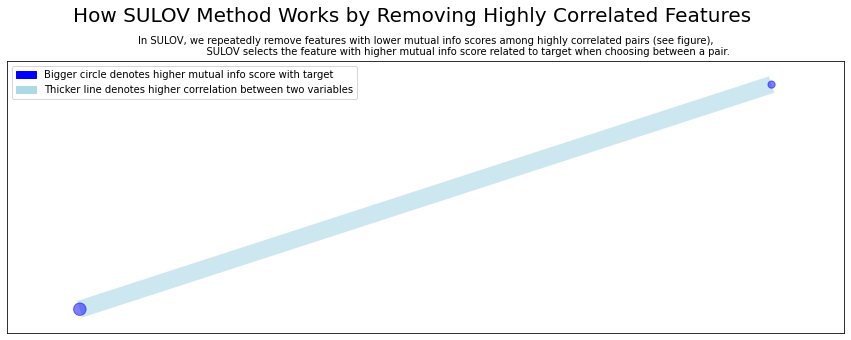

Time taken for SULOV method = 0 seconds
    Adding 2 categorical variables to reduced numeric variables  of 7
Final list of selected vars after SULOV = 9
Readying dataset for Recursive XGBoost by converting all features to numeric...
    there were no mixed data types or object columns that errored. Data is all numeric...
Shape of train data after pruning = (1033, 11)
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors = 9 
    XGBoost version using 1.6.2 as tree method: hist
Number of booster rounds = 100
        using 9 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 7 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 5 v

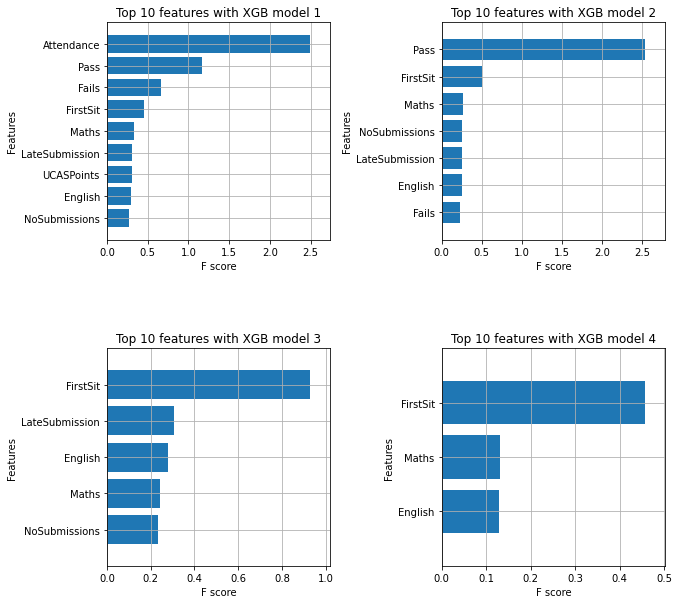

    Completed XGBoost feature selection in 0 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 9 important features:
['Attendance', 'Pass', 'Fails', 'FirstSit', 'Maths', 'LateSubmission', 'UCASPoints', 'English', 'NoSubmissions']
Total Time taken for featurewiz selection = 1 seconds
Output contains a list of 9 important features and a train dataframe


In [ ]:
from featurewiz import featurewiz

target = "desertion" 

features, data_full = featurewiz(data_prepro, target, corr_limit=0.8, verbose =2, sep=",", header= 0, test_data= 2, feature_engg= "", category_encoders="")